In [1]:
import numpy as np
import math
import pandas as pd
import scipy
import scipy.special
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

## Gamma

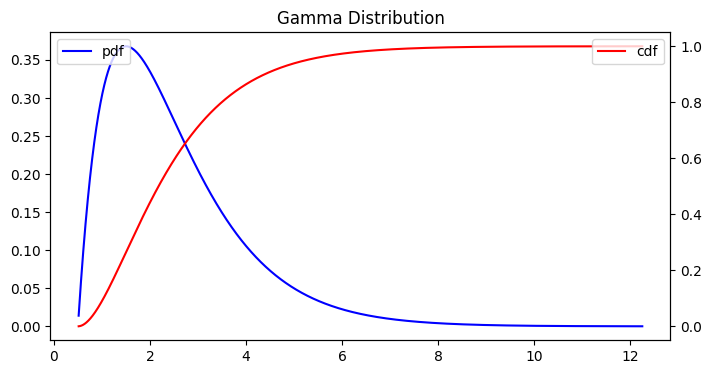

In [2]:
# Parameters of the gamma distribution
shape_parameter = 2  # Shape parameter (alpha)
scale_parameter = 0.5 # Scale parameter (lambda)
num_samples = 10000
x=np.linspace(stats.gamma.ppf(0.0001,shape_parameter,scale_parameter),
              stats.gamma.ppf(0.9999,shape_parameter,scale_parameter),
              num_samples)

from scipy.special import gamma

# def gamma_pdf(x, k, theta):
#     return (x**(k-1) * np.exp(-x/theta)) / (theta**k * gamma(k))

# fac = shape_parameter * np.log(scale_parameter)-math.lgamma(shape_parameter)
# f = np.exp(-scale_parameter*x+(shape_parameter-1)*np.log(x)+fac)
# F = scipy.special.gammainc(shape_parameter,scale_parameter*x)

f=stats.gamma.pdf(x,shape_parameter,scale_parameter)
F = stats.gamma.cdf(x, shape_parameter,scale_parameter)
fig,axes = plt.subplots(figsize=(8,4))
axes.set_title('Gamma Distribution')
axes.plot(x,f, 'b', label='pdf')
axes.legend(loc=2)
axes2 = axes.twinx()
axes2.plot(x,F,'r', label='cdf')
axes2.legend(loc=1)

Theoretical Mean: 1.0
Sample Mean: 1.0109493501944364
Theoretical Variance: 0.5
Sample Variance: 0.5141832839956251


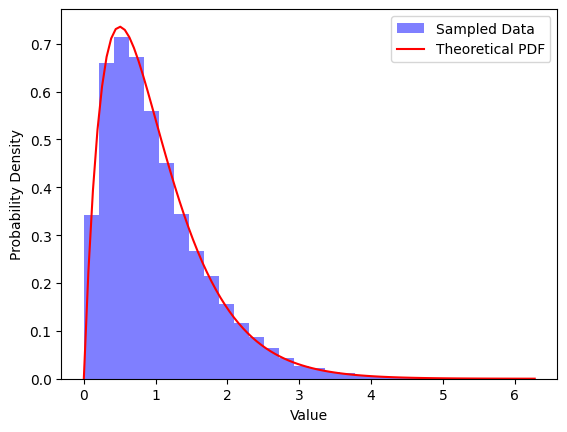

In [3]:
# Generate random samples from the gamma distribution
samples = np.random.gamma(shape_parameter, scale=scale_parameter, size=num_samples)

# Theoretical mean and variance of the gamma distribution
theoretical_mean = shape_parameter * scale_parameter
theoretical_variance = shape_parameter * (scale_parameter ** 2)

# Calculate the sample mean and sample variance
sample_mean = np.mean(samples)
sample_variance = np.var(samples, ddof=1)  # ddof=1 for unbiased variance estimate

# Print theoretical and sample statistics
print("Theoretical Mean:", theoretical_mean)
print("Sample Mean:", sample_mean)
print("Theoretical Variance:", theoretical_variance)
print("Sample Variance:", sample_variance)

# Plot a histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.5, color='b', label='Sampled Data')

# Plot the probability density function (PDF) of the gamma distribution
x = np.linspace(0, max(samples), 100)
pdf = stats.gamma.pdf(x, shape_parameter, scale=scale_parameter)
plt.plot(x, pdf, 'r', label='Theoretical PDF')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

In [2]:
# AutoCovariance
from scipy.signal import correlate
# Initialize the autocovariance array
# EX = (shape_parameter/scale_parameter) * t

C = np.zeros_like(samples)
# Calculate the autocovariance for each path
for i in range(len(samples)):
    deviation = samples[i] - theoretical_mean
    # Compute autocorrelation and normalize by the number of steps
    C[i] = correlate(deviation, deviation, mode='full') / num_samples
# Average over all paths
C = np.mean(C, axis=0)

plt.figure(figsize=(10, 6))
t = np.linspace(0, 1, num_samples)
# Plot theoretical autocovariance - sigma^2 / (2 * alpha) * exp(-alpha * t)
# plt.plot(t, np.sqrt(/t), 'r', label='Theory')

# Plot sampled autocovariance - plot second half since it's symmetric and the first half corresponds to negative lags
plt.plot(t, C[-200:], 'b', label='Sampled')
plt.legend(loc=0)
plt.title('Gamma: Autocovariance')

## Poisson

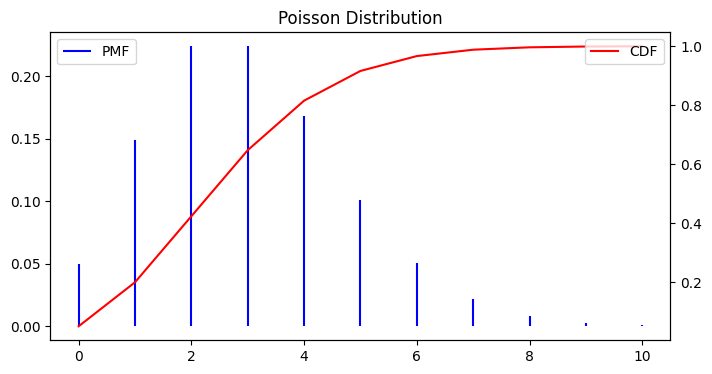

In [6]:
nsamples = 10000
lamb = 3.0 #peels off the y-axis and widens as lambda increases (rate param)
# x=np.linspace(stats.poisson.ppf(0.01,lamb), stats.poisson.ppf(0.99,lamb),nsamples)
samples = np.random.poisson(lamb, nsamples)
x = np.arange(0, max(samples))

# f = np.exp(-lamb + nsamples*np.log(lamb)-math.lgamma(nsamples+1))
# F = scipy.special.gammaincc(nsamples,lamb)
f=stats.poisson.pmf(x,lamb)
F = stats.poisson.cdf(x, lamb)
fig,axes = plt.subplots(figsize=(8,4))
axes.set_title('Poisson Distribution')
plt.vlines(np.arange(0, 11), 0, f, colors='b', label='PMF')
axes.legend(loc=2)
axes2 = axes.twinx()
axes2.plot(x,F,'r', label='CDF')
axes2.legend(loc=1)

Theoretical Mean: 3.0
Sample Mean: 3.033
Theoretical Variance: 3.0
Sample Variance: 3.022933933933934


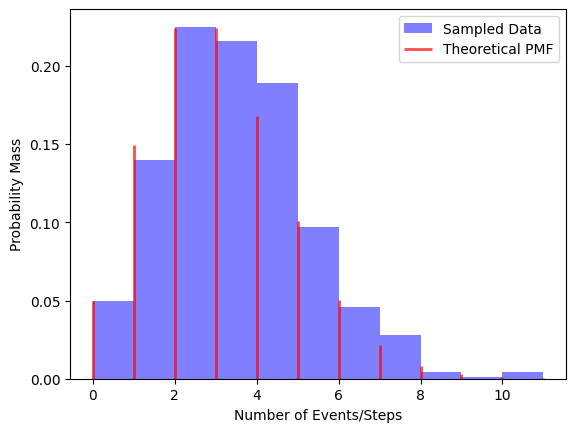

In [7]:
lambda_parameter = 3.0  # Mean and variance of the Poisson distribution
num_samples = 1000

# Generate random samples from the Poisson distribution
samples = np.random.poisson(lambda_parameter, num_samples)

# Calculate the sample mean and sample variance
sample_mean = np.mean(samples)
sample_variance = np.var(samples, ddof=1)  # ddof=1 for unbiased variance estimate

# Print theoretical and sample statistics
print("Theoretical Mean:", lambda_parameter)
print("Sample Mean:", sample_mean)
print("Theoretical Variance:", lambda_parameter)
print("Sample Variance:", sample_variance)

# Plot a histogram of the samples
plt.hist(samples, bins=max(samples) - min(samples), density=True, alpha=0.5, color='b', label='Sampled Data')

# Plot the probability mass function (PMF) of the Poisson distribution
x = np.arange(0, max(samples) + 1)
pmf = stats.poisson.pmf(x, lambda_parameter)
plt.vlines(x, 0, pmf, colors='r', lw=2, alpha=0.7, label='Theoretical PMF')

plt.xlabel('Number of Events/Steps')
plt.ylabel('Probability Mass')
plt.legend()
plt.show()


## Equation by hand

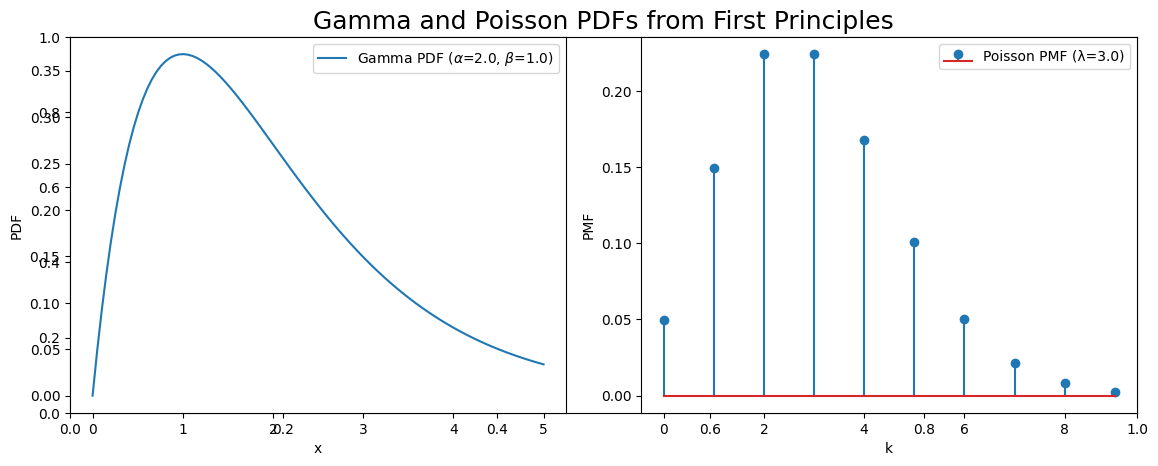

In [9]:
import scipy.special

# Gamma Distribution PDF Equation
def gamma_pdf(x, alpha, beta):
    pdf = (beta**alpha * x**(alpha - 1) * np.exp(-beta * x)) / scipy.special.gamma(alpha)
    return pdf

# Poisson Distribution PMF Equation
def poisson_pmf(k, lam):
    pmf = np.exp(-lam) * lam**k / scipy.special.factorial(k)
    return pmf

# Values at which to evaluate the PDFs/PMF
x_gamma = np.linspace(0, 5, 100)
k_poisson = np.arange(0, 10)

# Gamma Distribution Parameters
alpha = 2.0  # Shape parameter (k)
beta = 1.0  # Scale parameter (θ)

# Poisson Distribution Parameter
lam = 3.0  # Mean and variance

# Calculate the PDF and PMF
pdf_gamma = gamma_pdf(x_gamma, alpha, beta)
pmf_poisson = poisson_pmf(k_poisson, lam)

# Plot the PDF and PMF
plt.figure(figsize=(12, 5))
plt.title('Gamma and Poisson PDFs from First Principles', size=18)
# Gamma Distribution PDF
plt.subplot(1, 2, 1)
plt.plot(x_gamma, pdf_gamma, label=f'Gamma PDF ($\u03B1$={alpha}, $\u03B2$={beta})') 
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

# Poisson Distribution PMF
plt.subplot(1, 2, 2)
plt.stem(k_poisson, pmf_poisson, label=f'Poisson PMF (λ={lam})')
plt.xlabel('k')
plt.ylabel('PMF')
plt.legend()
plt.tight_layout()